# plotter code
This code is for plotting trajectories of different agents, and some analysis

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import glob
import os
from matplotlib.colors import LogNorm

overallpath="C:/Users/dexte/Documents/GitHub/ant_trajectory/"
datapath="success_plots_csvs/"
csv_files=[]


In [26]:
filepath = overallpath+datapath
csv_files = glob.glob(os.path.join(filepath, "*.csv"))
dataset=[]
for file in csv_files:
    csv_files.append(file)
    dataset.append(pd.read_csv(file))

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

Index(['Unnamed: 0', 'frame_number', 'body_x', 'body_y', 'body_prob', 'time',
       'headings', 'in_arena', 'body_x_cm', 'body_y_cm', 'rel_x', 'rel_y',
       'rel_x_cm', 'rel_y_cm', 'food_rel_x', 'food_rel_y', 'food_rel_x_cm',
       'food_rel_y_cm', 'dist_to_food_cm'],
      dtype='object')


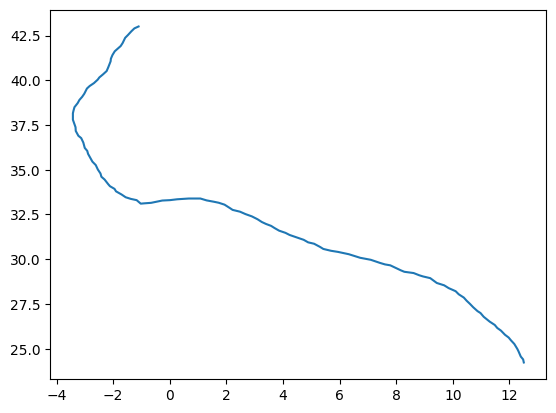

In [23]:
print(dataset[0].keys())
example=dataset[5]
plt.plot(example['rel_x_cm'],example['rel_y_cm'])
#plt.plot(example['food_rel_x_cm'],example['food_rel_y_cm'])
plt.show()

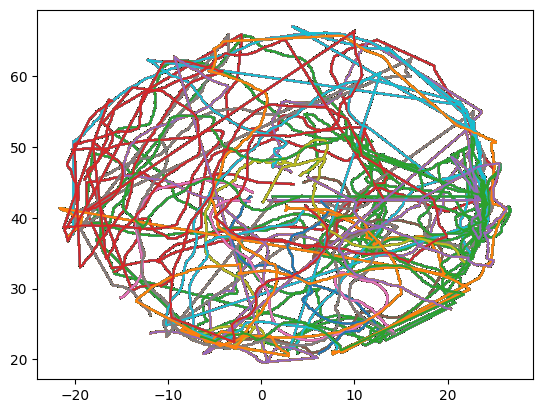

In [49]:
for example in dataset:
    plt.plot(example['rel_x_cm'],example['rel_y_cm'])
    #plt.plot(example['food_rel_x_cm'],example['food_rel_y_cm'])
plt.show()

## heatmap of paths

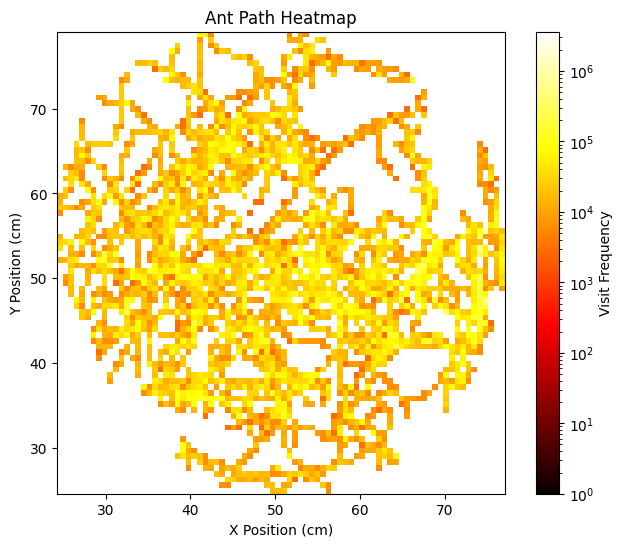

In [ ]:
all_x = []
all_y = []

for example in dataset:
    all_x.extend(example['body_x_cm'])
    all_y.extend(example['body_y_cm'])

heatmap, xedges, yedges = np.histogram2d(all_x, all_y, bins=80)

#plot the heatmap
plt.figure(figsize=(8, 6))
heatmap[heatmap]
plt.imshow(
    heatmap.T, origin='lower',
    extent=[min(all_x), max(all_x), min(all_y), max(all_y)],
    cmap='hot', interpolation='nearest',
    norm=LogNorm(vmin=1, vmax=heatmap.max())
)
plt.colorbar(label='Visit Frequency')
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title('Ant Path Heatmap')
plt.show()

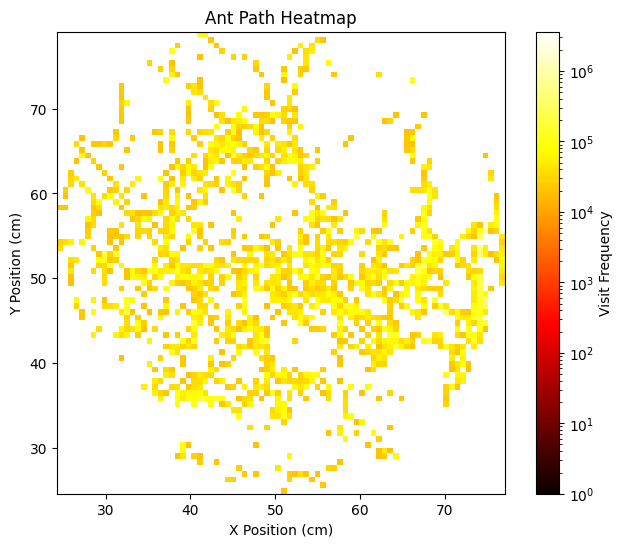

In [34]:
plt.figure(figsize=(8, 6))
heatmap[heatmap<np.average(heatmap)*1.5]=0
plt.imshow(
    heatmap.T, origin='lower',
    extent=[min(all_x), max(all_x), min(all_y), max(all_y)],
    cmap='hot', interpolation='nearest',
    norm=LogNorm(vmin=1, vmax=heatmap.max())
)
plt.colorbar(label='Visit Frequency')
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title('Ant Path Heatmap')
plt.show()

### lets do some vectors too

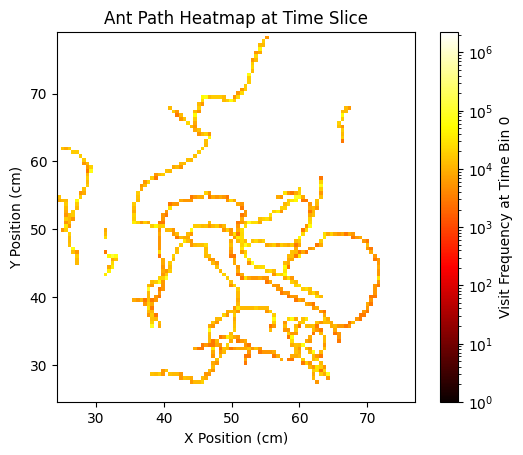

In [48]:

all_coords = []

for example in dataset: #gather dataset
    xs = example['body_x_cm']
    ys = example['body_y_cm']
    ts = example['time'] 

    for x, y, t in zip(xs, ys, ts):
        all_coords.append([x, y, t]) #add x y and time 

all_coords = np.array(all_coords)
heatmap, edges = np.histogramdd(all_coords, bins=(100, 100, 10)) #convert to a 3d histroygram 
time_index = 0
plt.imshow(
    heatmap[:, :, time_index].T, origin='lower',
    extent=[edges[0][0], edges[0][-1], edges[1][0], edges[1][-1]],
    cmap='hot', interpolation='nearest',
    norm=LogNorm(vmin=1, vmax=heatmap.max())
)
plt.colorbar(label='Visit Frequency at Time Bin {}'.format(time_index))
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title('Ant Path Heatmap at Time Slice')
plt.show()